In [1]:
import json
import pandas as pd

# File Paths
quiz_file = 'QuizEndpoint.json'
history_file =' APIEndpoint.json'
user_file = 'QuizSubmissionData.json' # Your last provided JSON

# Load JSON Files
with open(quiz_file, "r", encoding="utf-8") as qf, open(history_file, "r", encoding="utf-8") as hf, open(user_file, "r", encoding="utf-8") as uf:
    quiz_data = json.load(qf)
    history_data = json.load(hf)
    user_data = json.load(uf)


In [2]:
# Extract Current Quiz Details
latest_quiz = quiz_data["quiz"]
questions = latest_quiz["questions"]
latest_topic = latest_quiz["topic"]

# Create DataFrame for Question Responses
response_df = pd.DataFrame({
    "Question_ID": list(user_data["response_map"].keys()),
    "Selected_Option": list(user_data["response_map"].values())
})

# Convert Question_ID to Integer
response_df["Question_ID"] = response_df["Question_ID"].astype(int)
response_df["Selected_Option"] = response_df["Selected_Option"].astype(int)

print(response_df.head())


   Question_ID  Selected_Option
0         1837             7363
1         1848             7407
2         1852             7423
3         1862             7464
4         1877             7525


In [4]:
# Convert historical quiz data into DataFrame
history_df = pd.DataFrame(history_data)

# Extract Relevant Columns
history_df = history_df[["submitted_at", "score", "accuracy", "total_questions", "correct_answers", "incorrect_answers", "quiz"]]

# Convert accuracy to numeric (remove "%" and convert to float)
history_df["accuracy"] = history_df["accuracy"].str.replace(" %", "").astype(float)

# Convert date column to datetime format
history_df["submitted_at"] = pd.to_datetime(history_df["submitted_at"])

# Sort by latest quiz submission
history_df = history_df.sort_values(by="submitted_at", ascending=False)

print(history_df.head())


                      submitted_at  score  accuracy  total_questions  \
0 2025-01-17 15:30:18.027000+05:30    108      90.0              100   
1 2025-01-17 15:17:44.042000+05:30     92     100.0               23   
2 2025-01-16 20:13:19.682000+05:30    116      96.0              100   
3 2025-01-16 20:00:11.562000+05:30     36      90.0               23   
4 2025-01-15 20:34:39.462000+05:30     36      31.0              100   

   correct_answers  incorrect_answers  \
0               27                  3   
1               23                  0   
2               29                  1   
3                9                  1   
4                9                 20   

                                                quiz  
0  {'id': 51, 'name': None, 'title': 'Human Physi...  
1  {'id': 6, 'name': None, 'title': 'Human Physio...  
2  {'id': 51, 'name': None, 'title': 'Human Physi...  
3  {'id': 6, 'name': None, 'title': 'Human Physio...  
4  {'id': 51, 'name': None, 'title': 'Human P

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


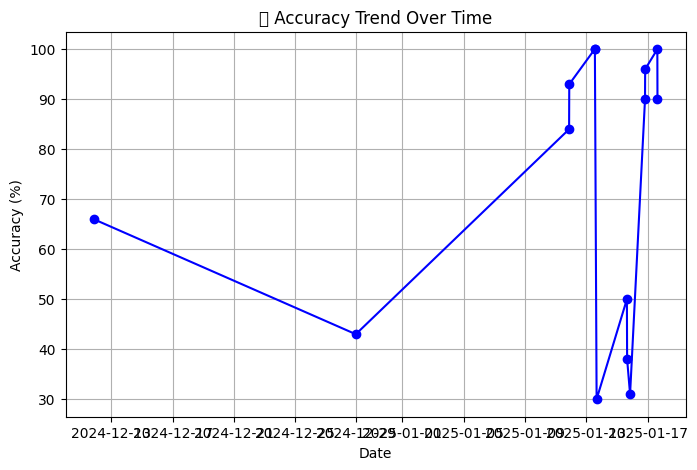

In [5]:
import matplotlib.pyplot as plt

# Extract trends
accuracy_trend = history_df[["submitted_at", "accuracy"]]

# Plot accuracy trend
plt.figure(figsize=(8, 5))
plt.plot(accuracy_trend["submitted_at"], accuracy_trend["accuracy"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Accuracy (%)")
plt.title("📈 Accuracy Trend Over Time")
plt.grid(True)
plt.show()


In [6]:
# Find topics with most mistakes
topic_mistakes = history_df.explode("quiz").groupby("quiz")["incorrect_answers"].sum().reset_index()

# Sort by most mistakes
weak_topics = topic_mistakes.sort_values(by="incorrect_answers", ascending=False).head(3)

print("Weakest Topics:\n", weak_topics)


Weakest Topics:
               quiz  incorrect_answers
0        banner_id                 82
17  lock_solutions                 82
31           topic                 82


In [7]:
recommendations = []

# If accuracy is below 80%, suggest conceptual revision
if history_df["accuracy"].mean() < 80:
    recommendations.append("📌 Focus on revising key concepts before practicing advanced questions.")

# Recommend revision based on weak topics
for topic in weak_topics["quiz"]:
    recommendations.append(f"📌 Revise topic: {topic}")

# Suggest solving past quizzes again if performance dropped
if history_df["score"].iloc[0] < history_df["score"].mean():
    recommendations.append("📌 Try solving previous quizzes again to reinforce learning.")

# Display Recommendations
print("\n✅ Personalized Recommendations:")
for rec in recommendations:
    print(rec)



✅ Personalized Recommendations:
📌 Focus on revising key concepts before practicing advanced questions.
📌 Revise topic: banner_id
📌 Revise topic: lock_solutions
📌 Revise topic: topic


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


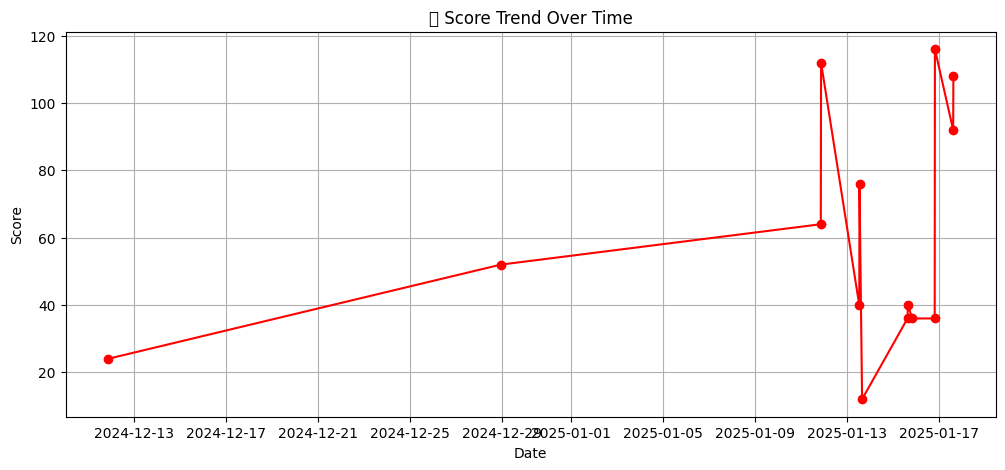

In [9]:
# Extract score trends
score_trend = history_df[["submitted_at", "score"]]

# Plot score trend
plt.figure(figsize=(12, 5))
plt.plot(score_trend["submitted_at"], score_trend["score"], marker="o", linestyle="-", color="r")
plt.xlabel("Date")
plt.ylabel("Score")
plt.title("📈 Score Trend Over Time")
plt.grid(True)
plt.show()


In [ ]:
import json
import pandas as pd

# File Paths
quiz_file = 'QuizEndpoint.json'
history_file =' APIEndpoint.json'
user_file = 'QuizSubmissionData.json' # Your last provided JSON

with open(quiz_file, "r", encoding="utf-8") as qf, open(history_file, "r", encoding="utf-8") as hf, open(user_file, "r", encoding="utf-8") as uf:
    quiz_data = json.load(qf)
    history_data = json.load(hf)
    user_data = json.load(uf)

# Extract Current Quiz Details
latest_quiz = quiz_data["quiz"]
questions = latest_quiz["questions"]
latest_topic = latest_quiz["topic"]

# Convert Historical Data to DataFrame
history_df = pd.DataFrame(history_data)

# Extract relevant columns
history_df = history_df[["submitted_at", "score", "accuracy", "total_questions", "correct_answers", "incorrect_answers", "quiz"]]

# Convert accuracy to numeric
history_df["accuracy"] = history_df["accuracy"].str.replace(" %", "").astype(float)

# Convert submission date to datetime format
history_df["submitted_at"] = pd.to_datetime(history_df["submitted_at"])

# Sort by most recent quiz
history_df = history_df.sort_values(by="submitted_at", ascending=False)

# Print Sample Data
print("\n📌 Historical Data Overview:")
print(history_df.head())
